In [33]:
from scipy.cluster.vq import kmeans2
from sklearn.linear_model import LogisticRegression as LR
import numpy as np
import plotly.graph_objects as go
import random


coords_cnt = 50
x = np.random.randint(0, 100, coords_cnt)
y = np.random.randint(0, 100, coords_cnt)
z = np.random.randint(0, 100, coords_cnt)
coords = [(float(x[i]), float(y[i]), float(z[i])) 
          for i in range(coords_cnt)]

colors_dict = {0: 'blue', 1: 'red'}
centroid, label = kmeans2(coords, 2)
colors = [colors_dict[l] for l in label]

lr = LR()
lr.fit(coords, label)
zz = lambda x, y: (-lr.intercept_[0] - lr.coef_[0][0] * x - lr.coef_[0][1] * y) / lr.coef_[0][2]
temp = np.linspace(0, 100, 100)
xx, yx = np.meshgrid(temp, temp)

PLOT = go.Figure()
PLOT.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color=colors)))
PLOT.add_trace(go.Surface(x=xx, y=yx, z=zz(xx, yx)))
PLOT.show()

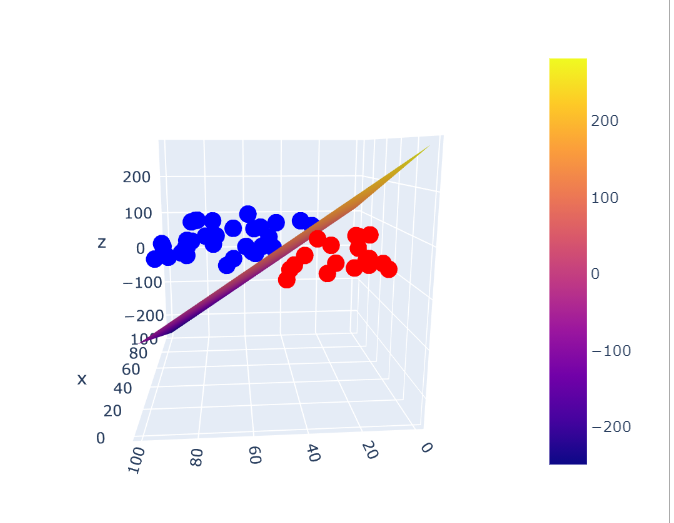